<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/CAP4633C_Mini_Project_Spring25_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAP 4633C. Spring 2025

**Mini Project**

GROUP 1:

***Aurisabel Fereira***

***Anays Garcia***

***Martha Requena***


General instructions

Every member of the same group MUST submit the same ipython notebook on Canvas.

Every group is allowed to ask me no more than one question or clarification about this assignment. By "one question/clarification," I mean a single part of a question. For example, if you ask me about part (a) of question 2, it counts as your one allowed question.
If you find that something is unclear, do not worry: just make a reasonable assumption and explain it so I know what you assumed.

Introduction

Show all your work in the Colab notebook that you will create to answer these questions. I should be able to understand and see all the steps and Python results that led to each course of action you took.

The only data set that you need for this assignment is the Heart data set, which is a csv file (“Heart_Exam1.csv”) that can be downloaded from the Comprehensive Assignment section on Canvas. Download this csv file and read it as a data frame in the Colab notebook that you will create to answer the exam.

The outcome variable in this data set is “HeartDisease”, a binary categorical variable that takes two numeric values: 0 (i..e, the person does NOT have heart disease) and 1 (i..e, the person has heart disease).


All predictors are quantitative. However, the predictor “Sex_M” was originally a categorical variable that was transformed into a dummy variable. “Sex_M” equals 1 if the person is Male and 0 if the person is Female. What does this mean to you?

First, notice that you DO NOT need to create any dummies (DO NOT need to use the method “get_dummies()”). Just use the predictors as they are.
Secondly, since “Sex_M” is a dummy, you should treat it differently during the standardization process.


Apply Logistic Regression to predict the outcome variable “HeartDisease” based on the seven predictors available in the Heart data set.

- Use 80% of the observations to train the model and 20% for testing.

- When applying Logistic Regression:

Set class_weight to None.
Use C = 1.
Use __max_iter = 1000__.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.pipeline import Pipeline # This allows us to sep up a pipeline to do the preprocessing
from sklearn.preprocessing import StandardScaler # Used to standardize the predictors
from sklearn.compose import ColumnTransformer # This allows to standardize only the non-dummy predictors.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heartdisease_data_path= '/content/drive/MyDrive/dataset/Heart_Exam1.csv'

In [ ]:
heartdisease_df= pd.read_csv(heartdisease_data_path)

In [ ]:
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   Sex_M         918 non-null    int64  
 7   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 57.5 KB


In [ ]:
heartdisease_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,HeartDisease
0,40,140,289,0,172,0.0,1,0
1,49,160,180,0,156,1.0,0,1
2,37,130,283,0,98,0.0,1,0
3,48,138,214,0,108,1.5,0,1
4,54,150,195,0,122,0.0,1,0


In [ ]:
X = heartdisease_df.drop(heartdisease_df.columns[7], axis=1)

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M
0,40,140,289,0,172,0.0,1
1,49,160,180,0,156,1.0,0
2,37,130,283,0,98,0.0,1
3,48,138,214,0,108,1.5,0
4,54,150,195,0,122,0.0,1


In [ ]:
y = heartdisease_df.iloc[:, 7]

In [ ]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [ ]:
y.value_counts()


,count
HeartDisease,
1,508
0,410


In [ ]:
#Preprocessing
quantitative_features_list = X.columns.difference (['Sex_M'])

In [ ]:
quantitative_features_list

Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP'], dtype='object')

In [ ]:
dummy_features_list = ['Sex_M']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features_list),
        ('cat', 'passthrough', dummy_features_list)
    ]
)

#Question 1 (35 points)

Apply Logistic Regression to predict the outcome variable “HeartDisease” based on the seven predictors available in the Heart data set.

- Use 80% of the observations to train the model and 20% for testing.

- When applying Logistic Regression:

Set class_weight to None.

Use C = 1.

Use max_iter = 1000.


In [ ]:
# Split data into training and testing sets (80% train, 20% test)
# Stratify ensures the target variable distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
pipeline_best_lr = Pipeline( [ ('preprocessor', preprocessor), ('logisticregression', LogisticRegression(class_weight= None , C= 1 , max_iter=1000)) ] )

In [ ]:
pipeline_best_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP'], dtype='object')),
                                                 ('cat', 'passthrough',
                                                  ['Sex_M'])])),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])

In [ ]:
y_test_pred_lr = pipeline_best_lr.predict(X_test)

##a) (8 points) Construct and SHOW in your notebook the confusion matrix summarizing the predictions of the test data. Use this matrix to report:

- The number (i.e., count, how many) of people with heart disease that the classifier incorrectly classifies as healthy.
- The number (i.e., count, how many) of healthy people that the classifier correctly classifies as healthy.

In [ ]:
CM_Lreg = confusion_matrix(y_test, y_test_pred_lr)

In [ ]:
cm_df_Lreg = pd.DataFrame(CM_Lreg, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_df_Lreg

,Predicted 0,Predicted 1
Actual 0,55,27
Actual 1,20,82


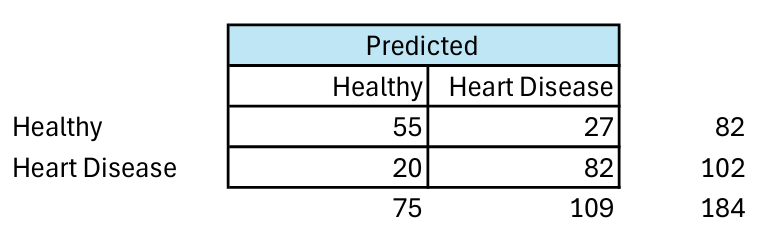

<font color="red">Based on the confusion matrix, 20 individuals with heart disease were incorrectly classified as healthy, while 55 healthy individuals were correctly identified as healthy.

## b) (4 points) If we applied this classifier to classify the heart disease status of 220 people that we know have heart disease, how many of them do you expect the model to incorrectly classify? Justify by showing how you got your answer.

To get the False Negative Rate with this confusion Matrix:

TP = 82

FN = 20

In [ ]:
False_negative_rate = 20/(20+82)
False_negative_rate

0.19607843137254902

In [ ]:
incorrectly_classified = 220 * 0.196
incorrectly_classified

43.120000000000005

<font color="red">We expect the model to incorrectly classify approximately
__43 out of 220 individuals__ who actually have heart disease, meaning it would predict them as healthy despite their condition.

##c) (4 points) If we applied this classifier to classify the heart disease status of 150 people that we know are healthy (i.e., none of them have heart disease), how many of them do you expect the model to correctly classify? Justify by showing how you got your answer.

To get the correct classifications for healthy individuals with this confusion Matrix:

TN = 55

FP = 27

In [ ]:
True_negative_rate = 55/(55+27)
True_negative_rate


0.6707317073170732

In [ ]:
correctly_classified = 150 * 0.6707317073170732
correctly_classified

100.60975609756098

<font color="red">We expect the model to correctly classify approximately 101 out of 150 healthy individuals.

##d) (10 points) Apply Logistic Regression again as you did in part a, but this time set the hyperparameter C = 0.001.

###d1) Does this change lead to a better error rate on the test data? Justify.

In [ ]:
pipeline_best_lr2 = Pipeline( [ ('preprocessor', preprocessor), ('logisticregression', LogisticRegression(class_weight= None , C= 0.001 , max_iter=1000)) ] )

In [ ]:
pipeline_best_lr2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP'], dtype='object')),
                                                 ('cat', 'passthrough',
                                                  ['Sex_M'])])),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=1000))])

In [ ]:
y_test_pred_lr2 = pipeline_best_lr.predict(X_test)

In [ ]:
CM_Lr2 = confusion_matrix(y_test, y_test_pred_lr2)

In [ ]:
cm_df_Lreg_C001 = pd.DataFrame(CM_Lr2, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_df_Lreg_C001

,Predicted 0,Predicted 1
Actual 0,55,27
Actual 1,20,82


<font color="red">No, this change did not lead to a better error rate on the test data.
This is because the confusion matrix, which summarizes the model’s classification performance, remained exactly the same. As a result, the number of correct and incorrect predictions did not change, meaning the error rate—defined as the proportion of incorrect predictions—also stayed the same.

###d2) By setting C = 0.001 instead of C = 1 as in part a), are we increasing or decreasing the regularization strength compared to part a? Justify.

<font color="red">The C parameter in Logistic Regression controls the strength of regularization: a smaller C value (such as 0.001) implies stronger regularization, which can simplify the model and help prevent overfitting. Therefore, setting C = 0.001 __increases the regularization strength__ compared to C = 1, since C is the inverse of regularization strength.


##e) (9 points) Use the logistic regression model from part a) to answer this question.

###e 1) Report the predictor (only one predictor) with the strongest positive influence on the probability that a person has heart disease. Justify your selection.

In [ ]:
# Here we create a data frame to display the coefficients and their absolute values

lr_coeff = pipeline_best_lr.named_steps['logisticregression'].coef_#get the coefficient
lr_coeff_abs= np.abs(lr_coeff[0])
lr_coeffs_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_coeff[0], 'Abs value of coeff': lr_coeff_abs})

In [ ]:
lr_coeffs_df.sort_values(by='Abs value of coeff', ascending=False, inplace=True)
lr_coeffs_df

,Feature,Coefficient,Abs value of coeff
4,MaxHR,1.103266,1.103266
6,Sex_M,1.083113,1.083113
3,FastingBS,-0.814372,0.814372
2,Cholesterol,0.577572,0.577572
1,RestingBP,-0.292885,0.292885
0,Age,0.108856,0.108856
5,Oldpeak,0.020275,0.020275


<font color="red">In Logistic Regression, the influence of a predictor is determined by the magnitude of its coefficient. Among all predictors with positive coefficients, MaxHR has the highest value, indicating that it has the strongest positive impact on the probability of having heart disease. Therefore, __MaxHR__ is the most influential predictor in increasing this likelihood in the model.

###e 2) If the predictor chosen in e 1) increases by 25 units, how much does the odds of getting heart disease increase? Justify BY SHOWING YOUR WORK.

In [ ]:
np.exp(1.103266)

np.float64(3.013993669990876)

This means that for every 1-unit increase in MaxHR, the odds of having heart disease are multiplied by ~3.013.

Odds Ratio (25 unit) =e**(25 * 1.103266)
 ≈951,827,825,677

In [ ]:
coeff_MaxHR = 1.103266
increase = 25

odds_increase = np.exp(coeff_MaxHR * increase)
odds_increase

np.float64(951827825676.8439)

<font color="red">If MaxHR increases by 25 units, the odds of having heart disease increase by a factor of approximately 951,827,825,677 — a massive increase.

---
# **Question 2 (25 points)**

Use the results from the train_test_split() method that you used in question 1 (i.e., use the same training and testing data you used in question 1).

##a) (10 points) Apply a Random Forest classifier to the Heart dataset. Construct this forest with the following characteristics:
- Number of trees = 300
- Criterion to grow the trees in the forest: Gini index
- The max number of features that the method randomly selects when deciding on a split as the trees are constructed should be 2 less than the number of available features.
- Class weights: ‘balanced’ if one of the classes represents at least 70% of the observations in the original data set. Otherwise, use None.

Report the overall test accuracy of the forest that you got.


In [ ]:
y.value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
# Ratio of cases of minority over majority

round (410/508, 4)

0.8071

The minority class is ~ 80.71% of the majority class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
rf_heart= RandomForestClassifier(class_weight = 'balanced', criterion ='gini', max_features = 5, n_estimators = 300, random_state = 1)

In [ ]:
rf_heart.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=5,
                       n_estimators=300, random_state=1)

In [ ]:
y_pred_heart_rf = rf_heart.predict (X_test)

In [ ]:
confusion_matrix(y_test, y_pred_heart_rf)

array([[56, 26],
       [25, 77]])

To get the overall test accuracy of the forest with this confusion Matrix:

TN = 56

FP = 26

FN = 25

TP = 77,

The Accuracy = (TP + TN)/ (TP + TN + FP + FN) = (77 + 56) / (77 + 56 + 26 + 25) = 133/184 = 72.39%.

In [ ]:
(77 + 56) / (77 + 56 + 26 + 25)

0.7228260869565217

<font color="red">The overall test accuracy of the Ramdon forest model is approximately __72.39%__.

##b)(10 points) Apply Boosting to the Heart dataset. Construct this forest with the following characteristics:
- Number of trees = 300
- Lambda value  = 1
- Tree depth = 3

Report the overall test error rate of the forest that you got.

In [ ]:
boosting_heart= GradientBoostingClassifier(learning_rate = 1, max_depth= 3, n_estimators = 300,  random_state = 1)

In [ ]:
boosting_heart.fit (X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=300, random_state=1)

In [ ]:
y_pred_heart_boosting = boosting_heart.predict (X_test)

In [ ]:
confusion_matrix(y_test, y_pred_heart_boosting)

array([[51, 31],
       [23, 79]])

To get the overall Error Rate of the boosting model with this confusion Matrix:

TN = 51

FP = 31

FN = 23

TP = 79,

The Error Rate = (FP + FN)/ (TP + TN + FP + FN) = (31 + 23) / (77 + 56 + 26 + 25) = 54/184 = 29.35%.

In [ ]:
(31 + 23) / (77 + 56 + 26 + 25)

0.29347826086956524

<font color="red">The overall test error rate of the boosting model is approximately __29.35%__.

##c) (5 points) Compare the classifier obtained using a random forest (part a) with the classifier obtained after applying boosting (part b) based on their sensitivity to detect people with heart disease. Which one is better? Justify.

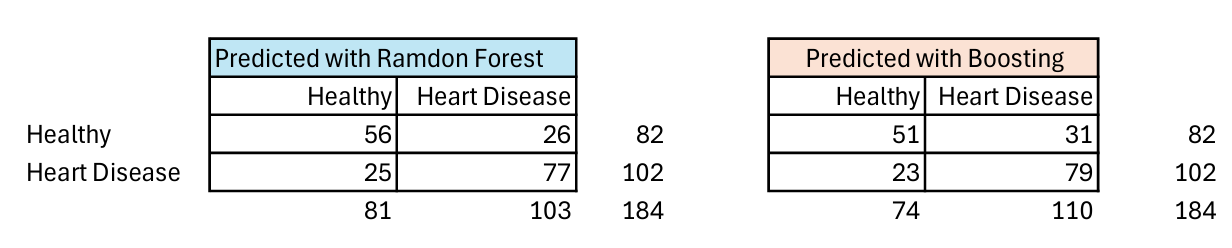

To compare the sensitivity (also called recall or true positive rate) of the two classifiers in detecting people with heart disease (class = 1), we use the formula: TP/ (TP + FN).

Sensitivity for Ramdon Forest = 77/(77+25) = 77/102 ≈ 0.7549 or 75.5%

Sensitivity for Boosting Model= 79/(79+23) = 79/102 ≈ 0.7745 or 77.5%

In [ ]:
77/102

0.7549019607843137

In [ ]:
79/102

0.7745098039215687

<font color="red">The boosting model has a slightly higher sensitivity (77.5%) compared to the random forest (75.5%).
Since Boosting is more effective at correctly identifying positive heart disease cases, it is **better in terms of sensitivity**. This makes it more suitable for medical applications where **missing a person with heart disease (false negative)** could have serious consequences..

---
# **Question 3 (10 points)**

The following table shows the result of applying Logistic Regression to predict the values of Y, where Y is a categorical variable representing whether the person has heart disease (‘Yes’) or not (‘No).

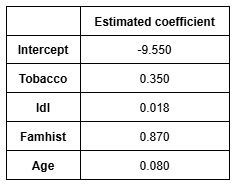

Description of predictors:
- Tobacco (whether a person smokes). It takes two values: 1 (the person smokes) and 0 (the person is not a smoker)
- ldl (the level of ldl cholesterol in the blood). This is a quantitative variable.
- Famhist (whether a person has a family history of heart disease). It takes two values: 1 (the person has a family history of heart disease) and 0 (the person does not have family history of heart disease)
- age (the person’s age). This is a quantitative variable.

Use a probability threshold of 0.25 and all of these predictors in a logistic regression model to predict whether a patient with the following characteristics has heart disease or not.

You MUST SHOW all your work to answer both parts!

logit(p)= β0 + β1 *Tobacco + β2 * ldl +β3 * Famhist + β4 * Age

logit(p)= -9.550 + 0.350 * Tobacco + 0.018 * ldl + 0.870* Famhist + 0.080 * Age

Then: p = a / (1 + e^-logit(p))


If the predicted probability p ≥ 0.25, the model predicts "Yes" (has heart disease).

If p < 0.25, the model predicts "No" (does not have heart disease).

p = 1 / (1 + e^-(-9.550 + 0.350 * Tobacco + 0.018 * ldl + 0.870* Famhist + 0.080 * Age))

##a) (5 points) A 60 years old patient who smokes, with an ldl of 125 mg/dl, and a family history of heart disease.



p = 1 / (1 + e^-(-9.550 + 0.350 + 0.018 * 125 + 0.870 + 0.080 * 60)) = 1 / (1 + e^-(-9.550 + 0.350 + 0.018 * 125 + 0.870 + 0.080 * 60)) = 1/(1 + e^(1.28))

In [ ]:
intercept = -9.550
tobacco = 1
ldl = 125
famhist = 1
age = 60

In [ ]:
logit = (
    intercept +
    0.350 * tobacco +
    0.018 * ldl +
    0.870 * famhist +
    0.080 * age
)
logit

-1.2800000000000011

In [ ]:
import math

In [ ]:
exp_val=math.exp(1.2800000000000011)
exp_val

3.5966397255692857

In [ ]:
probability = 1 / (1 + exp_val)

In [ ]:
if probability > 0.25:
    prediction = "Yes"
else:
    prediction = "No"

# Step 3: Output result
print("Predicted probability:", round(probability, 4))
print("Prediction (Threshold 0.25):", prediction)

Predicted probability: 0.2176
Prediction (Threshold 0.25): No


<font color="red">The predicted probability = 0.217 y p < 0.25, the model predicts "No", __the patient does not have heart disease__ according with this model

## b) (5 points) A patient with the same characteristic as the patient described in a), but with a higher ldl cholesterol (175 mg/dl).

Reminder: Evaluating the logistic regression model returns the probability that Y= ‘Yes’



p = 1 / (1 + e^-(-9.550 + 0.350 + 0.018 * 175 + 0.870 + 0.080 * 60)) = 1 / (1 + e^-(-9.550 + 0.350 + 0.018 * 175 + 0.870 + 0.080 * 60)) = 1/(1 + e^(0.38))

In [ ]:
intercept = -9.550
tobacco = 1
ldl2 = 175
famhist = 1
age = 60

In [ ]:
logit_2 = (
    intercept +
    0.350 * tobacco +
    0.018 * ldl2 +
    0.870 * famhist +
    0.080 * age
)
logit_2

-0.3800000000000008

In [ ]:
import math

exp_val2=math.exp(0.3800000000000008)
exp_val2

1.4622845894342256

In [ ]:
probability2 = 1 / (1 + exp_val2)

In [ ]:
if probability2 > 0.25:
    prediction = "Yes"
else:
    prediction = "No"

# Step 3: Output result
print("Predicted probability:", round(probability2, 4))
print("Prediction (Threshold 0.25):", prediction)

Predicted probability: 0.4061
Prediction (Threshold 0.25): Yes


<font color="red">The predicted probability = 0.406 y p ≥ 0.25, the model predicts "Yes" the patient have heart disease according with this model. So, increasing the ldl cholesterol from 125 to 175 mg/dl pushed the probability above the threshold, changing the classification from "No" to "Yes"

---

# **Question 4 (15 points)**

Use the results from the train_test_split() method that you used in question 1 (i.e., use the same training and testing data you used in question 1).

a) (10 points) Apply SVM with a polynomial kernel. Consider the following REQUIREMENTS to apply SVM:

Standardize the predictors.
Use CV via GridSearch to select the values of two hyperparameters: Degree and C.
For C, use this array of values:

[0.001, 0.01, 0.1, 1, 5, 10, 20, 50]

For Degree, try from a linear model to a polynomial of third degree.
For class weights, use None.
Use 10 folds in cross-validation.
Choose based on overall accuracy.

In [ ]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M
209,54,125,216,0,140,0.0,1
656,62,124,209,0,163,0.0,0
451,64,144,0,0,122,1.0,1
294,32,95,0,1,127,0.7,1
545,48,132,272,0,139,0.2,1
...,...,...,...,...,...,...,...
23,44,150,288,0,150,3.0,1
61,43,150,254,0,175,0.0,0
477,61,110,0,1,108,2.0,1
871,61,150,243,1,137,1.0,1


In [ ]:
from sklearn.svm import SVC

In [ ]:
pipeline_gridsearch_svm= Pipeline([('preprocessor', preprocessor), ('svc', SVC())])

In [ ]:
c_hyperparameters = [0.001, 0.01, 0.1, 1, 5, 10, 20, 50]
degree = [1, 2, 3]
class_weight = [None]

In [ ]:
hyperparam_grid_svm = {
    'svc__C': c_hyperparameters,
    'svc__degree': degree,
    'svc__class_weight': class_weight,
    'svc__kernel': ['poly']
}

In [ ]:
cv_set_up = KFold (n_splits= 10, shuffle= True, random_state= 1)

In [ ]:
grid_search_svm= GridSearchCV(estimator= pipeline_gridsearch_svm, param_grid= hyperparam_grid_svm, cv= cv_set_up, scoring= 'accuracy')

In [ ]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP'], dtype='object')),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         ['Sex_M'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50],
                         'svc__class_weight': [None], 'svc__degree': [1, 2, 3],
                         'svc__kernel': ['poly']},
             scoring='accuracy')

In [ ]:
print("Best hyperparameters found: ", grid_search_svm.best_params_)

Best hyperparameters found:  {'svc__C': 10, 'svc__class_weight': None, 'svc__degree': 2, 'svc__kernel': 'poly'}


In [ ]:
pipeline_best_svm= Pipeline([('preprocessor', preprocessor), ('svc', SVC(C= 10, degree= 2, kernel= 'poly', class_weight=None))])

In [ ]:
pipeline_best_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP'], dtype='object')),
                                                 ('cat', 'passthrough',
                                                  ['Sex_M'])])),
                ('svc', SVC(C=10, degree=2, kernel='poly'))])

In [ ]:
y_test_pred_svm= pipeline_best_svm.predict(X_test)

In [ ]:
confusion_matrix_svm=confusion_matrix(y_test, y_test_pred_svm)
confusion_matrix_svm

array([[58, 24],
       [30, 72]])


Answer the following TWO questions:

*   Does the SVM model have more sensitivity or more specificity on test data? JUSTIFY.

To compare the sensitivity (also called recall or true positive rate) of this classifiers in detecting people with heart disease (class = 1), we use the formula: TP/ (TP + FN).

Sensitivity for SVM Model = 72/(72+30) = 72/102 ≈ 0.7059 or 70.6%

Specificity for SVM Model = TN/ (TN + FP) = 58/(58+24) = 58/82 ≈ 0.7073 or 70.73%

In [ ]:
72/(72+30)

0.7058823529411765

In [ ]:
58/(58+24)

0.7073170731707317

<font color = 'red'>The SVM model has slightly more specificity (70.73%) than sensitivity (70.59%) on the test data — though the difference is very small.


- Report the value of a metric that represents the confidence that you can have in the classifier when it classifies an observation as class 0.

<font color='red'>To measure how confident the model is when it predicts someone as healthy (class 0), we look at the **precision for class 0**, which is **0.66**. ou can be about 65.91% confident that the person actually does not have heart disease.


b) (5 points) Why does it NOT make sense to oversample the 1 class in this problem? EXPLAIN.

Hint: The answer is NOT “because this dataset is not unbalanced”. That’s NOT the right answer.

<font color ='red'>Oversampling is typically used when the data is imbalanced—that is, when one class is significantly less frequent than the other. The goal of oversampling is to give the model more examples of the minority class so it learns to recognize it better.

But in this case: Oversampling class 1 isn’t needed because both classes are already well balanced. More importantly, SVM with a polynomial kernel is sensitive to repeated or synthetic data. Adding artificial points can introduce noise, distort the decision boundary, and reduce model performance

---

# **Question 5 (15 points)**

This question is about Support Vector Machines. You do not have to use Python to answer this question. However, you should include the written answers to this question in the same notebook you created to answer question 1.

The figure below shows the hyperplane (i.e., the solid black line) obtained after applying SVM with a linear boundary to a small dataset. This hyperplane attempts to separate observations that belong to the orange class and those that belong to the blue class.



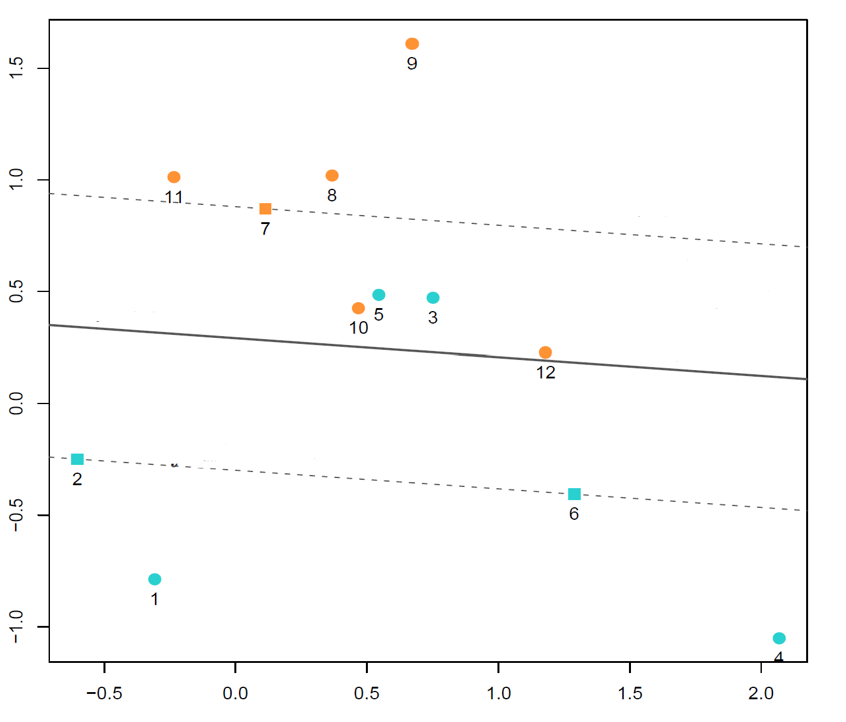

__a)__ (4 points) Is this hyperplane a separating hyperplane? Justify

<font color='red'>No, the hyperplane is supposed to be chosen so that every observation is on the correct side of the hyperplane. However,  in this case, it misclassifies a few observations. It is not a true __separating hyperplane__ because it doesn’t perfectly separate the two classes. Specifically, points __5 and 3__ (which are blue) are on the orange side of the hyperplane.


__b)__ (4 points) What is the predicted class for a new observation with X1= 1 and X2= 0? Explain how you arrived at this prediction.

Note: X1 is the predictor represented on the X axis and X2 is the predictor represented on the Y axis.

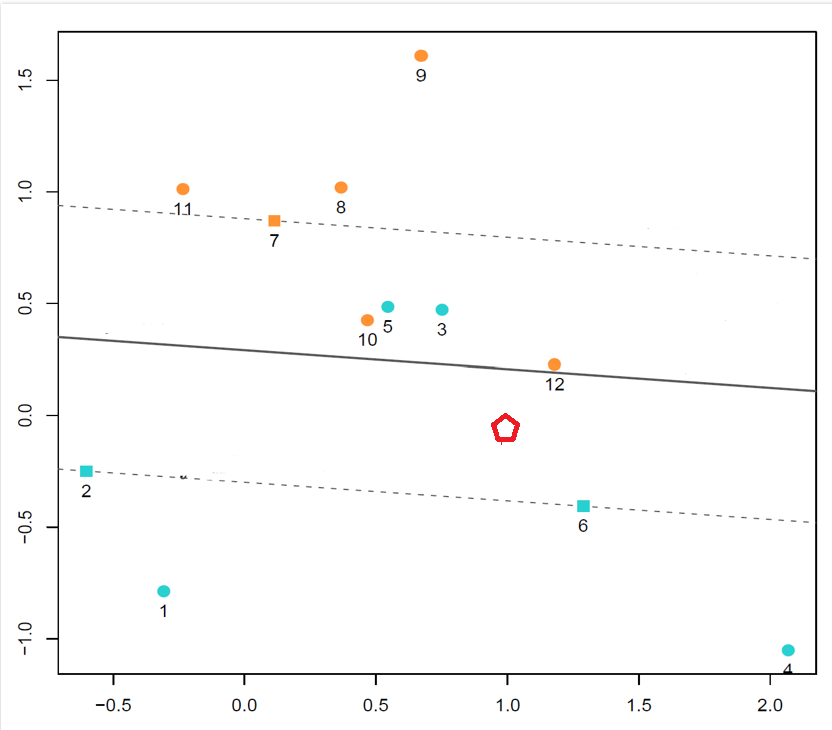

<font color='red'> As shown in the graphic, where the new observation is represented by a red polygon, you can see that the new point falls __below the hyperplane__the region where most of the blue class points are located. Therefore, the model would classify this observation as belonging to the __blue__ class.



__c)__ (4 points) Obtain the error rate (in %) of this hyperplane on this small dataset (i.e., the error rate on this training data). Show and explain how you obtained the error rate.

<font color='red'>From the plot, we can see that the hyperplane misclassifies **2 points**:

<font color='red'>**Point 3** and **Point 5** are both **blue**, but they fall on the **orange side** of the hyperplane.  

<font color='red'>This means the model would incorrectly predict them as **orange**.
There are a total of **12 observations**, so the error rate is calculated as:


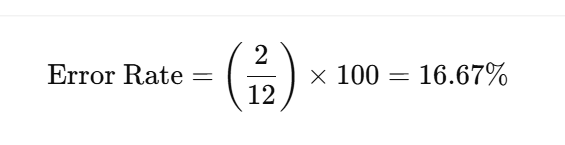

In [ ]:
total_points = 12

misclassified_points = 2

error_rate = (misclassified_points / total_points) * 100

print(f"Error Rate: {error_rate:.2f}%")


Error Rate: 16.67%


<font color='red'>The error rate of the hyperplane on this small dataset is __16.67%__

__d)__ (3 points) If the tuning parameter C is increased, how do you expect the value of the error rate on the training data to change? In other words, do you expect the training error rate to decrease or increase? Justify

Note: To justify, you can simply refer to the fragments from the SVM presentation where we discussed the hyperparameter C in the context of SVM.

<font color='red'>When we increase C, the model tries harder to get all the training points right. This makes the training error go down. But it can also cause overfitting, meaning the model might not work as well on new data.